# Project Description – Image classification using CNNs in Keras


##  Data Description:

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.


## Dataset:
The dataset can be download from Olympus. The data file names are:
- images.npy
- Label.csv

The original files are from Kaggle. <br>
Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. <br>
So that you can work on the data/project seamlessly without worrying about the high data volume.


## Context:
Can you differentiate a weed from a crop seedling? <br>
The ability to do so effectively can mean better crop yields and better stewardship of the environment.<br>
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages


## Steps and tasks:


1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)<BR>
a. Normalization.<BR>
b. Gaussian Blurring.<BR>
c. Visualize data after pre-processing.<BR>
3. Make data compatible: (10 Marks)<BR>
a. Convert labels to one-hot-vectors.<BR>
b. Print the label for y_train[0].<BR>
c. Split the dataset into training, testing, and validation set.<BR>
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)<BR>
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.<BR>
4. Building CNN: (15 Marks)
a. Define layers.<BR>
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)<BR>
5. Fit and evaluate model and print confusion matrix. (10 Marks)<BR>
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)<BR>


## Import the Libraries

In [1]:
#Libraries for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import numpy as np
import pandas as pd


from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import cv2


from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a Keras Model
from tensorflow.keras.layers import Conv2D              # Conv2D creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just a regular densely-connected NN layer.

# Libraries for classification model evaluation
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve,roc_auc_score,accuracy_score


## Load Dataset

In [2]:
images = np.load('images.npy')      # load images from images.npy file
labels = pd.read_csv('labels.csv')  # load lables from labels.csv file

## Dataset shape

In [3]:
print(images.shape)       # display the shape of images vector

(4750, 128, 128, 3)


**Insights**



- There are 4750 images.    [shape index - 0 ]
- The size of images is 128*128 pixel.  [shape index - 1,2]
     - That is height is 128 and width is 128
- There are three color channels (i.e R,G,B) for all the pixels. [shape index - 3]

In [4]:
print(labels.shape)         # display the shape of labels df
print(labels.dtypes)

(4750, 1)
Label    object
dtype: object


- There are 4750 labels for 4750 images
- The labels datatype is object. For classification ,the type should converted to one-hot-vectors.

In [5]:
labels.head()      # display head of labels dataframe

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

In [6]:
# shape of single image
print(images[0].shape)

(128, 128, 3)


**Insights**

- The individual images are of size 128 width and 128 height.
- Each image has 3 channels(R,W,B)

In [7]:
print(images[0])    # display the vector value for one image

[[[ 35  52  78]
  [ 36  49  76]
  [ 31  45  69]
  ...
  [ 78  95 114]
  [ 76  93 110]
  [ 80  95 109]]

 [[ 33  46  68]
  [ 37  50  73]
  [ 48  65  83]
  ...
  [ 81  96 113]
  [ 74  89 105]
  [ 83  95 109]]

 [[ 34  50  68]
  [ 35  52  72]
  [ 70  85 101]
  ...
  [ 83  97 112]
  [ 79  94 108]
  [ 79  94 107]]

 ...

 [[ 35  50  69]
  [ 42  57  73]
  [ 42  57  72]
  ...
  [ 60  76  92]
  [ 67  81  97]
  [ 64  77  95]]

 [[ 36  52  67]
  [ 48  63  78]
  [ 41  57  73]
  ...
  [ 44  66  83]
  [ 58  76  91]
  [ 57  74  90]]

 [[ 44  58  70]
  [ 43  57  73]
  [ 40  55  72]
  ...
  [ 41  70  92]
  [ 55  78  97]
  [ 61  79  96]]]


**Insights**

- Each image is vecor of shape (128,128,3)<br>
- Each image has 3 color channels

## Display Images

Label : ['Small-flowered Cranesbill']


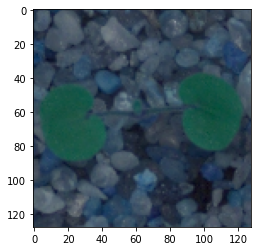

Label : ['Small-flowered Cranesbill']


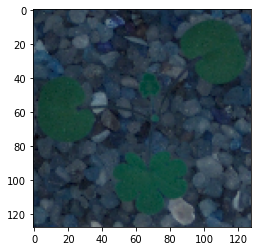

Label : ['Small-flowered Cranesbill']


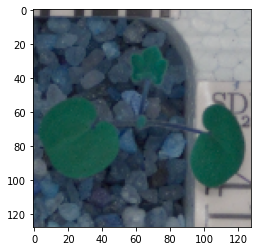

Label : ['Small-flowered Cranesbill']


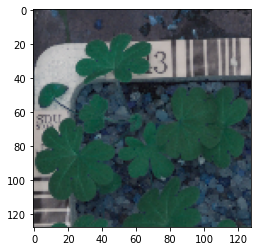

Label : ['Small-flowered Cranesbill']


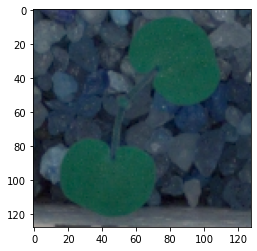

Label : ['Small-flowered Cranesbill']


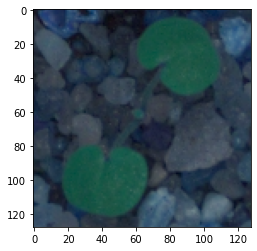

Label : ['Small-flowered Cranesbill']


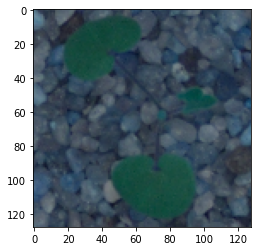

Label : ['Small-flowered Cranesbill']


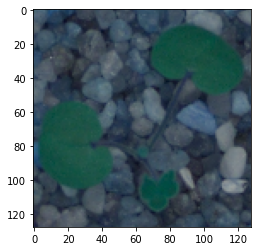

Label : ['Small-flowered Cranesbill']


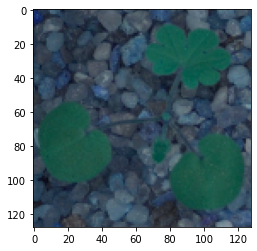

Label : ['Small-flowered Cranesbill']


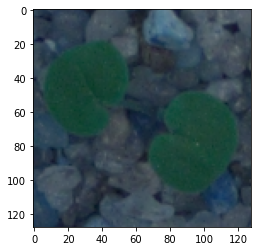

Label : ['Small-flowered Cranesbill']


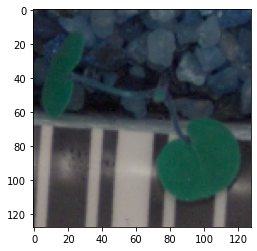

Label : ['Small-flowered Cranesbill']


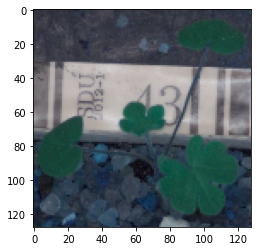

Label : ['Small-flowered Cranesbill']


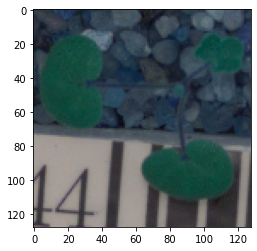

Label : ['Small-flowered Cranesbill']


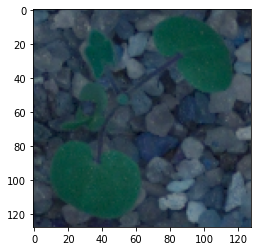

Label : ['Small-flowered Cranesbill']


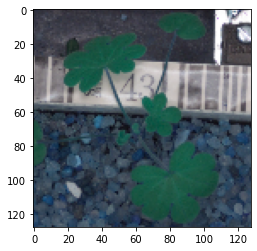

Label : ['Small-flowered Cranesbill']


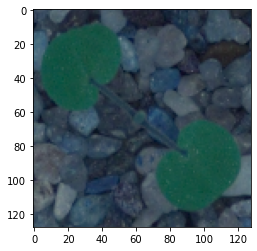

In [8]:
# As display 4750 images is computationally expensive task, I am displaying only first 15 images.

i=0
for img in images[:16]:
    print(f'Label : {labels.iloc[i].values}')
    i = i+1
    plt.imshow(img)
    plt.show()
    

### Data Pre-processing

a. Normalization. b. Gaussian Blurring. c. Visualize data after pre-processing.

### Gaussian Blurring

In [9]:
#Implementing GaussianBlur on each image

images_blur = []
i = 0
for img in images:
    t = cv2.GaussianBlur(img, (5, 5), 4)
    images_blur.append(t)

Label : ['Small-flowered Cranesbill']


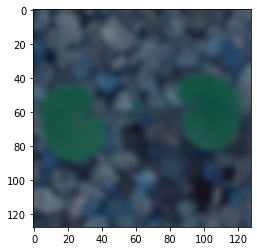

Label : ['Small-flowered Cranesbill']


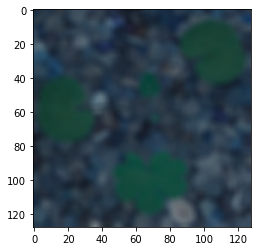

Label : ['Small-flowered Cranesbill']


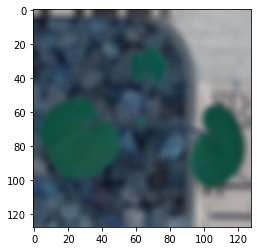

Label : ['Small-flowered Cranesbill']


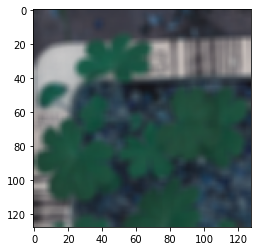

Label : ['Small-flowered Cranesbill']


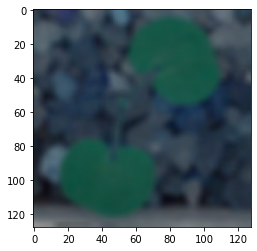

Label : ['Small-flowered Cranesbill']


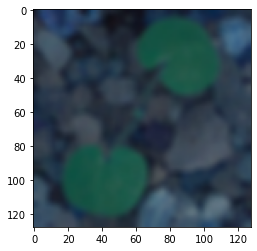

Label : ['Small-flowered Cranesbill']


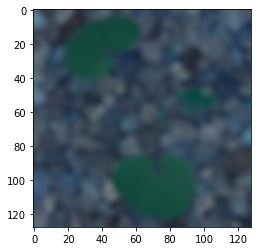

Label : ['Small-flowered Cranesbill']


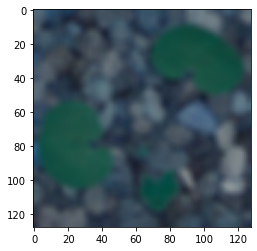

Label : ['Small-flowered Cranesbill']


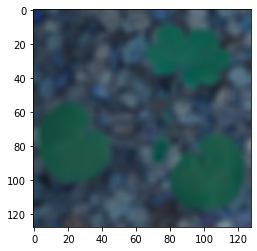

Label : ['Small-flowered Cranesbill']


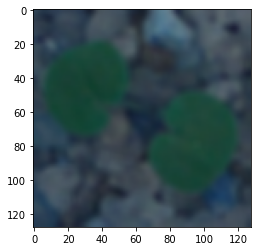

Label : ['Small-flowered Cranesbill']


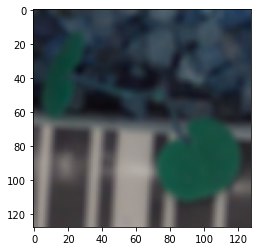

Label : ['Small-flowered Cranesbill']


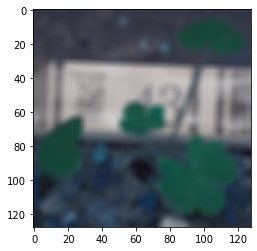

Label : ['Small-flowered Cranesbill']


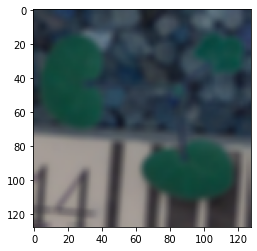

Label : ['Small-flowered Cranesbill']


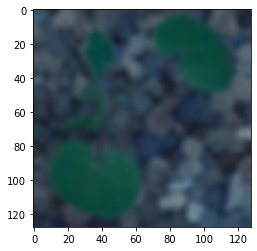

Label : ['Small-flowered Cranesbill']


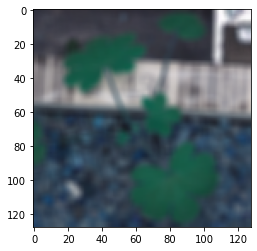

Label : ['Small-flowered Cranesbill']


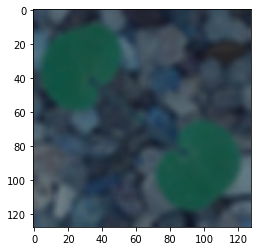

In [10]:
# Display first few images after implementing GaussianBlur
i=0
for img in images_blur[:16]:
    print(f'Label : {labels.iloc[i].values}')  # print corresponding label
    i = i+1
    plt.imshow(img)   # display image
    plt.show()



### Normalization

In [11]:
# Normalize the values 

images_blur = np.array(images_blur)
images_blur_norm = images_blur.astype('float32')
images_blur_norm /= 255


Label : ['Small-flowered Cranesbill']


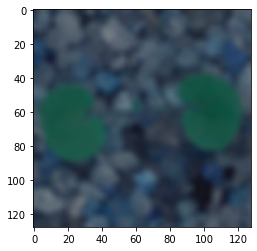

Label : ['Small-flowered Cranesbill']


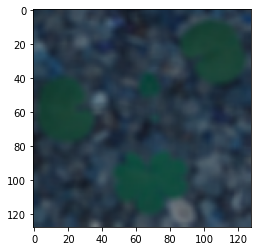

Label : ['Small-flowered Cranesbill']


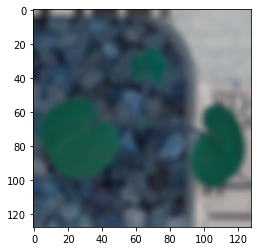

Label : ['Small-flowered Cranesbill']


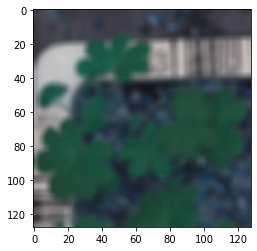

Label : ['Small-flowered Cranesbill']


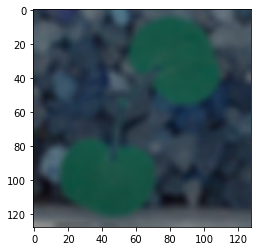

Label : ['Small-flowered Cranesbill']


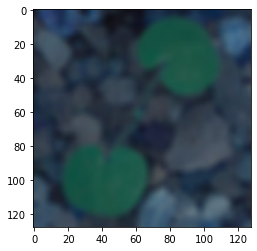

Label : ['Small-flowered Cranesbill']


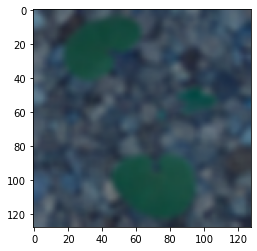

Label : ['Small-flowered Cranesbill']


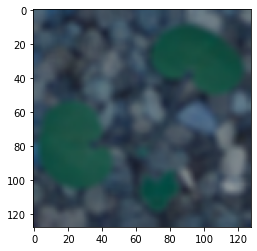

Label : ['Small-flowered Cranesbill']


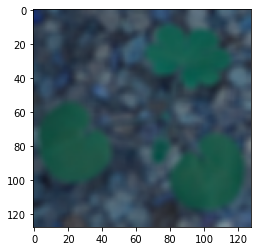

Label : ['Small-flowered Cranesbill']


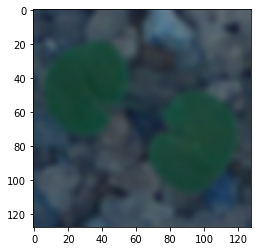

Label : ['Small-flowered Cranesbill']


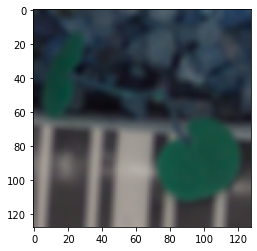

Label : ['Small-flowered Cranesbill']


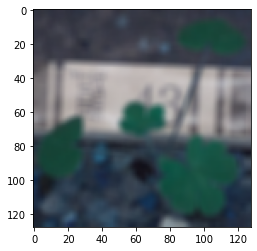

Label : ['Small-flowered Cranesbill']


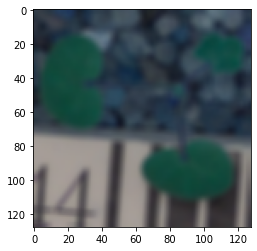

Label : ['Small-flowered Cranesbill']


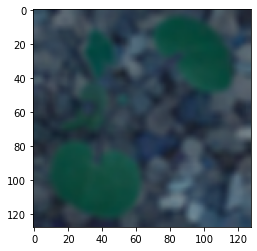

Label : ['Small-flowered Cranesbill']


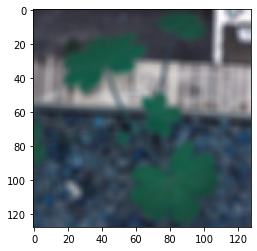

Label : ['Small-flowered Cranesbill']


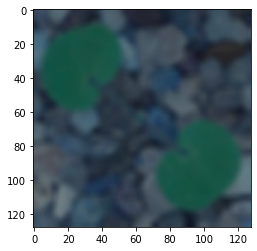

In [12]:
# Display images after Normalization
i = 0
for img in images_blur_norm[:16]:
    print(f'Label : {labels.iloc[i].values}')
    i = i+1
    plt.imshow(img)
    plt.show()
    
    

### Make data compatible

### One-hot encode the class vector
- convert class vectors (integers) to class matrix
- Split data into  traning ,test and validation sets

In [13]:
# Display number of unique values in the lables
labels.Label.nunique()

12

In [14]:
# get the unique value names in the given labels.
labels.Label.unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

**Insights**

There are 12 unique labels in the given list.

In [15]:
import pandas as pd

y_pdf = labels
y_pdf = pd.get_dummies(y_pdf)

print(y_pdf.shape)
y_pdf.head()

(4750, 12)


Label_Black-grass  Label_Charlock  Label_Cleavers  Label_Common Chickweed  \
0                  0               0               0                       0   
1                  0               0               0                       0   
2                  0               0               0                       0   
3                  0               0               0                       0   
4                  0               0               0                       0   

   Label_Common wheat  Label_Fat Hen  Label_Loose Silky-bent  Label_Maize  \
0                   0              0                       0            0   
1                   0              0                       0            0   
2                   0              0                       0            0   
3                   0              0                       0            0   
4                   0              0                       0            0   

   Label_Scentless Mayweed  Label_Shepherds Purse  \
0                        0                      0   
1                        0                      0   
2                        0                      0   
3                        0                      0   
4                        0                      0   

   Label_Small-flowered Cranesbill  Label_Sugar beet  
0                                1                 0  
1                                1                 0  
2                                1                 0  
3                                1                 0  
4                                1                 0

In [16]:
y = np.array(y_pdf)  # y labels are converted to vectors.
print(y[0])    # display first vector
print(y.shape) # display shape of the vector

[0 0 0 0 0 0 0 0 0 0 1 0]
(4750, 12)


###  Split data set to Training, Test and Validation sets
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)

In [17]:
# Split data into training set and test set
Img_train, Img_test, lbl_train, lbl_test = train_test_split(images_blur_norm, y, test_size = 0.3, random_state = 7)

#Split the train set into training set and validation set
Img_val, Img_test, lbl_val ,lbl_test = train_test_split(Img_test, lbl_test, test_size=0.5, random_state=1)

In [18]:
# Display the shape of training , test and validation data sets
print( "Shape of Img_train: ", Img_train.shape)
print( "Shape of lbl_train: ", lbl_train.shape)

print( "Shape of Img_val: ", Img_val.shape)
print( "Shape of lbl_val: ", lbl_val.shape)

print( "Shape of Img_test: ", Img_test.shape)
print( "Shape of lbl_test: ", lbl_test.shape)

Shape of Img_train:  (3325, 128, 128, 3)
Shape of lbl_train:  (3325, 12)
Shape of Img_val:  (712, 128, 128, 3)
Shape of lbl_val:  (712, 12)
Shape of Img_test:  (713, 128, 128, 3)
Shape of lbl_test:  (713, 12)


**Insights on shape of training, validation and test sets**

- Training data set.

    - 3325 images in Img_train dataset.
    - Images are of dimention 128 h and 128 width
    - 3 (in shape[3]) represents RGB channels
    - Corresponding 3325 labels in lbl_train dataset.
    - labels data set is converted to
    

- Validation data set.

    - 712 images in Img_validation dataset.
    - Corresponding 712 labels in lbl_val dataset.
    - Images are of dimention 128 h and 128 width
    - 3 (in shape[3]) represents RGB channels
    
    
- Test data set.

    - 713 images in Img_test dataset.
    - Corresponding 713 labels in lbl_test dataset.
    - Images are of dimention 128 h and 128 width
    - 3 (in shape[3]) represents RGB channels

## Building CNN: 

In [19]:
# Code to display Confusion Matrix

In [20]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''
    #( accuracy, precision, recall, f1_score ) = (0,0,0,0)

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
        
    

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


### Model 1 : Simple Model with 3 Conv2D layers

- A Simple CNN Model
- 3 consecutive Conv2D Netwroks with reLu activation function
- Input shape of image is (128,128,3). Input Images are 3 channel(RGB) color images.
- one MaxPooling2D layer is added at the end before sending Flattend output to Dense ANN network.
- Dense ANN network with two layers is added.
- The output layer is added with softmax activation function having 12 nuerons( because we have 12 classes in our multi classifier problem)

In [21]:
# Initialising the CNN classifier
classifier1 = Sequential()

# Add a Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier1.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier1.add(Dense(units = 512, activation = 'relu'))

# Adding a fully connected layer with 128 neurons
classifier1.add(Dense(units = 128, activation = 'relu'))

# The final output layer with 12 neurons to predict the categorical classifcation
classifier1.add(Dense(units = 12, activation = 'softmax'))

In [22]:
classifier1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               67109376  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6

In [23]:
# Compile the model
classifier1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
history1 = classifier1.fit(x=Img_train, y=lbl_train, batch_size=32, epochs=10, validation_data=(Img_val, lbl_val))

Epoch 1/10
104/104 [==============================] - 148s 1s/step - loss: 1.9512 - accuracy: 0.3450 - val_loss: 1.3694 - val_accuracy: 0.5211
Epoch 2/10
104/104 [==============================] - 143s 1s/step - loss: 1.1239 - accuracy: 0.6156 - val_loss: 1.1755 - val_accuracy: 0.5618
Epoch 3/10
104/104 [==============================] - 148s 1s/step - loss: 0.8939 - accuracy: 0.6842 - val_loss: 1.1919 - val_accuracy: 0.6011
Epoch 4/10
104/104 [==============================] - 147s 1s/step - loss: 0.6467 - accuracy: 0.7693 - val_loss: 0.9051 - val_accuracy: 0.6994
Epoch 5/10
104/104 [==============================] - 148s 1s/step - loss: 0.5067 - accuracy: 0.8208 - val_loss: 0.9857 - val_accuracy: 0.7107
Epoch 6/10
104/104 [==============================] - 153s 1s/step - loss: 0.4055 - accuracy: 0.8577 - val_loss: 1.1753 - val_accuracy: 0.6798
Epoch 7/10
104/104 [==============================] - 154s 1s/step - loss: 0.2558 - accuracy: 0.9077 - val_loss: 1.2093 - val_accuracy: 0.6812

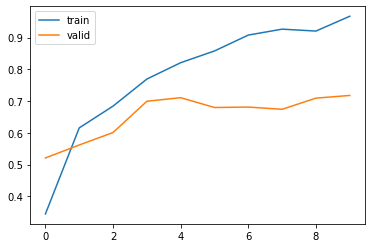

In [24]:
# Capturing accuracy per epoch
hist1  = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

# Plotting Accuracy at different epochs
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

**Insights from Accuracy plot**

- Training accuracy is more than validation Accuracy.
- There is huge difference between Training accuracy and validation Accuracy.
- Training and Validation graphs did not converge.

All these indicate  over fit of the model.

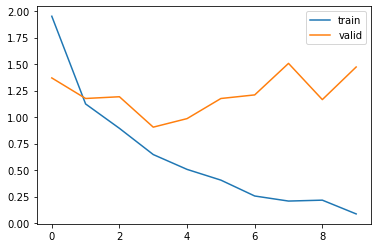

In [25]:
# Capturing loss per epoch
hist1  = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch


# Plotting loss at different epochs
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc = 0)

**Insights from Loss plot**

- Training loss is less than validation loss.
- There is huge difference between Training loss and validation loss.
- Training and Validation graphs did not converge.

All these indicate  over fit of the model.

(713, 12)
range(0, 713)


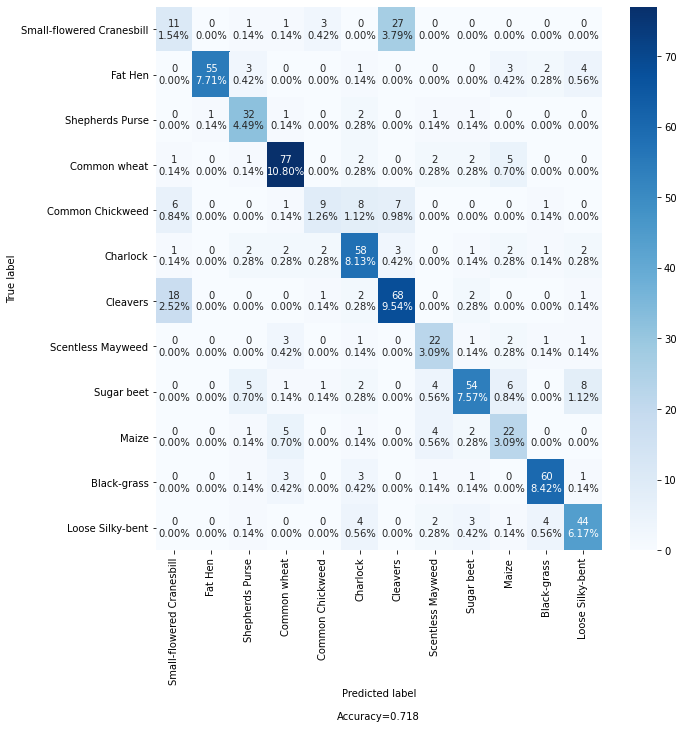

In [26]:
import seaborn as sn
y_pred1 = classifier1.predict(Img_test)      # get probability 


# Convert prediction probabilites to predictions
y_pred2 = np.zeros(shape=(y_pred1.shape[0],12))
for i in range(len(y_pred1)):
    max_ind = np.argmax(y_pred1[i])
    for j in range(12):
        if(j == max_ind):
            y_pred2[i][j] = int(1)
        else:
            y_pred2[i][j] = int(0)
            

y_pred2 = y_pred2.astype(int)    # precition matrix

print(y_pred1.shape)
print(range(len(y_pred2)))

cm1 = confusion_matrix(lbl_test.argmax(axis=1), y_pred2.argmax(axis=1))

labels = ['True Negative','False Positive','False Negative','True Positive']

categories = ['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent']


make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues', figsize =(10,10))


**Insights from Confusion Matrix**

- Accuracy shows as 0.718
- Common wheat and Cleavers are two seeds which have high prediction .
- Black grass and Sugar beet also show decent number of Correct predictions.
- There are around 8 SUgar beet plants which are wrongly predicted as Loose-silky bend.
- 'Common chicken' weed has less correct predictions. This plants is mosly worngly predicted as Cleavers. 
May be this plant looks similar to Cleavers.
- 'Small-flowered Cranesbill' has less correct predictions. This plants is mosly worngly predicted as Cleavers. 
May be this plant looks similar to Cleavers.

In [27]:
score = classifier1.evaluate(Img_test, lbl_test)

23/23 [==============================] - 6s 260ms/step - loss: 1.3635 - accuracy: 0.7181


**Insights from Classfier1**

- Over all accuracy of the model is 71.8
- The Accuracy is decent but it can be improved.
- This model shows over fit tendency.This can be controlled by adding dropouts , callback.
- we can also try more number of Maxpooling layers to improve accuracy

### Model2 - with 4 Conv2D layers

- A Simple CNN Model
- 4 consecutive Conv2D Netwroks with reLu activation function are added
- Input shape of image is (128,128,3). Input Images are 3 channel(RGB) color images.
- one MaxPooling2D layer is added before sending Flattend output to Dense ANN network.
- Dense ANN network with two layers having 512,218 nuerons is added.
- The output layer is added with softmax activation function having 12 nuerons( because we have 12 classes in our multi classifier problem)

In [28]:
# Initialising the CNN classifier
classifier2 = Sequential()

# Add a Convolution layer with 128 kernels of 3X3 shape with activation function ReLU
classifier2.add(Conv2D(128, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
classifier2.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
classifier2.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'valid'))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier2.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier2.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier2.add(Dense(units = 512, activation = 'relu'))

# Adding a fully connected layer with 128 neurons
classifier2.add(Dense(units = 128, activation = 'relu'))

# The final output layer with 12 neurons to predict the categorical classifcation
classifier2.add(Dense(units = 12, activation = 'softmax'))

In [29]:
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 128)     3584      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      73792     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 64)      36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 124, 124, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)              

In [30]:
import tensorflow.keras.callbacks

# Compile the model
classifier2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
history2 = classifier2.fit(x=Img_train, y=lbl_train, batch_size=32, epochs=10, validation_data=(Img_val, lbl_val))

Epoch 1/10
104/104 [==============================] - 277s 3s/step - loss: 2.3059 - accuracy: 0.2096 - val_loss: 1.7785 - val_accuracy: 0.3778
Epoch 2/10
104/104 [==============================] - 358s 3s/step - loss: 1.4094 - accuracy: 0.5194 - val_loss: 1.3986 - val_accuracy: 0.5154
Epoch 3/10
104/104 [==============================] - 580s 6s/step - loss: 0.9576 - accuracy: 0.6740 - val_loss: 1.0682 - val_accuracy: 0.6461
Epoch 4/10
104/104 [==============================] - 371s 4s/step - loss: 0.7115 - accuracy: 0.7441 - val_loss: 1.0632 - val_accuracy: 0.6587
Epoch 5/10
104/104 [==============================] - 373s 4s/step - loss: 0.5455 - accuracy: 0.8057 - val_loss: 1.2522 - val_accuracy: 0.6573
Epoch 6/10
104/104 [==============================] - 358s 3s/step - loss: 0.3779 - accuracy: 0.8602 - val_loss: 1.0943 - val_accuracy: 0.6952
Epoch 7/10
104/104 [==============================] - 423s 4s/step - loss: 0.2870 - accuracy: 0.8962 - val_loss: 1.1930 - val_accuracy: 0.6629

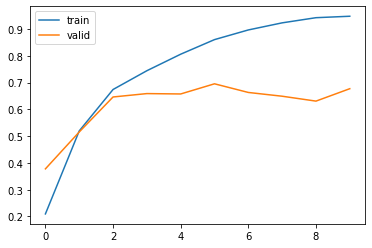

In [31]:
# Capturing recall per epoch
hist2  = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

# Plotting recall at different epochs
plt.plot(hist2['accuracy'])
plt.plot(hist2['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

**Insights from Accuracy plot**

- Training accuracy is more than validation Accuracy.
- There is huge difference between Training accuracy and validation Accuracy.
- Training and Validation graphs did not converge.

All these indicate  over fit of this model(Classifier2).

Validation accuracy has reduced compared to Classifier1 model.
Adding one exter conv2D layer to Classifier2 has increased overfit on model. This should be handled.

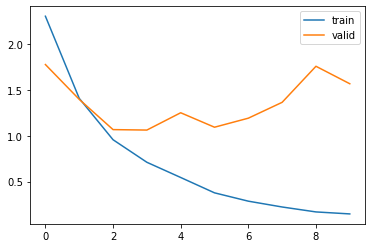

In [32]:
# Capturing learning history per epoch
hist2  = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(("train" , "valid") , loc = 0)

**Insights from Loss plot**

- Training loss is less than validation loss.
- There is huge difference between Training loss and validation loss.
- Training and Validation graphs did not converge.

All these indicate  over fit of the model.

loss is more than classifier1. loss can be reduced further.

(713, 12)
range(0, 713)


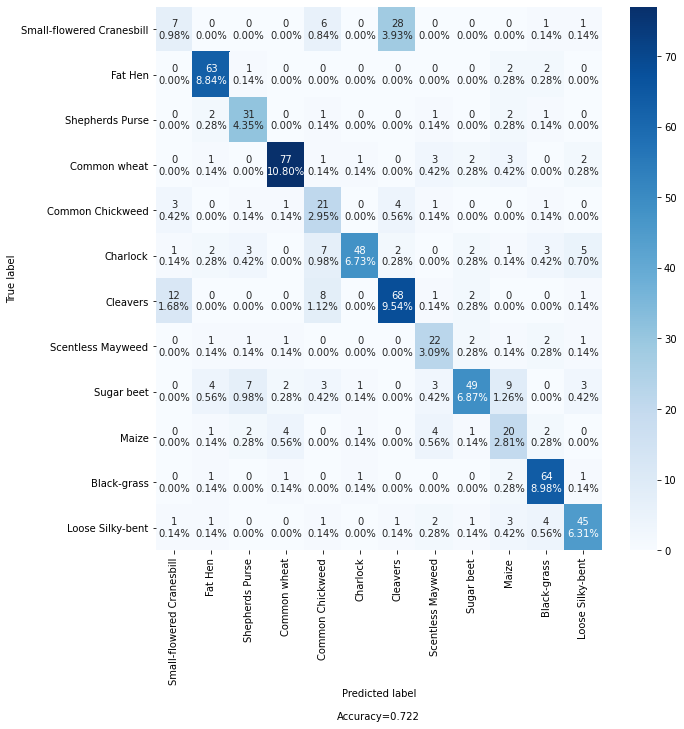

In [33]:
import seaborn as sn
y_pred1 = classifier2.predict(Img_test)  # Prediction probability matrix

print(y_pred1.shape)
print(range(len(y_pred2)))

# Logic to convert prediction probabilities to predictions
y_pred2 = np.zeros(shape=(y_pred1.shape[0],12))
for i in range(len(y_pred1)):
    max_ind = np.argmax(y_pred1[i])
    for j in range(12):
        if(j == max_ind):
            y_pred2[i][j] = int(1)
        else:
            y_pred2[i][j] = int(0)
            

y_pred2 = y_pred2.astype(int)       # Prection matrix 
    

cm2 = confusion_matrix(lbl_test.argmax(axis=1), y_pred2.argmax(axis=1))

labels = ['True Negative','False Positive','False Negative','True Positive']

categories = ['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent']


make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues', figsize =(10,10))



**Insights from Confusion Matrix**

- Accuracy shows as 0.722
- Common wheat and Cleavers are two seeds which have high prediction .
- Black grass and Sugar beet also show good number of Correct predictions after (Common wheat and Cleavers).
- There are around 10 SUgar beet plants which are wrongly predicted as Shepherds Purse.
- 'Common chicken' weed has less correct predictions. This plants is mosly wronngly predicted as Cleavers. 
May be this plant looks similar to Cleavers.
- 'Small-flowered Cranesbill' has less correct predictions. This plants is mosly worngly predicted as Cleavers. 
May be this plant looks similar to Cleavers.

In [34]:
score2 = classifier2.evaluate(Img_test, lbl_test)

23/23 [==============================] - 12s 504ms/step - loss: 1.3799 - accuracy: 0.7223


**Insights from Classfier2**

- Over all accuracy of the model is 72.23
- The Accuracy is almost same as model1
- This model shows over fit tendency.This can be controlled by adding dropouts , callback.
- we can also try more number of Maxpooling layers to improve accuracy

### Model 3 - Added Dropouts, Pooling

In [35]:
# Initialising the CNN classifier
classifier3 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier3.add(Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier3.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier3.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier3.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier3.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier3.add(Dropout(0.5))

# Adding a fully connected layer with 128 neurons
classifier3.add(Dense(units = 128, activation = 'relu'))

# The final output layer with 12 neurons to predict the categorical classifcation
classifier3.add(Dense(units = 12, activation = 'softmax'))

In [36]:
classifier3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)             

In [37]:
# Compile the model
classifier3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
history3 = classifier3.fit(x=Img_train, y=lbl_train, batch_size=32, epochs=10, validation_data=(Img_val, lbl_val))

Epoch 1/10
104/104 [==============================] - 37s 356ms/step - loss: 2.1960 - accuracy: 0.2439 - val_loss: 1.6761 - val_accuracy: 0.4368
Epoch 2/10
104/104 [==============================] - 39s 374ms/step - loss: 1.6373 - accuracy: 0.4192 - val_loss: 1.5163 - val_accuracy: 0.4705
Epoch 3/10
104/104 [==============================] - 46s 441ms/step - loss: 1.3608 - accuracy: 0.5140 - val_loss: 1.1923 - val_accuracy: 0.6011
Epoch 4/10
104/104 [==============================] - 47s 456ms/step - loss: 1.0853 - accuracy: 0.6241 - val_loss: 1.0610 - val_accuracy: 0.6601
Epoch 5/10
104/104 [==============================] - 45s 433ms/step - loss: 0.9414 - accuracy: 0.6617 - val_loss: 1.0477 - val_accuracy: 0.6531
Epoch 6/10
104/104 [==============================] - 47s 452ms/step - loss: 0.8007 - accuracy: 0.7131 - val_loss: 0.9604 - val_accuracy: 0.6882
Epoch 7/10
104/104 [==============================] - 48s 459ms/step - loss: 0.6658 - accuracy: 0.7591 - val_loss: 0.8536 - val_ac

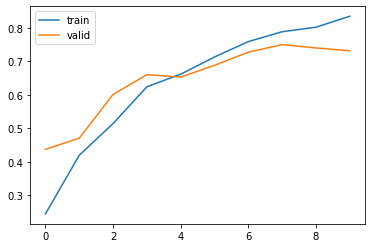

In [38]:
# Capturing recall per epoch
hist3  = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch

# Plotting recall at different epochs
plt.plot(hist3['accuracy'])
plt.plot(hist3['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

**Insights from Accuracy plot**

- There is huge reduction in overfit behaviour when compared to previous two models.
- Validation accuracy and Training Accuracy are near to converge.
- The Validation accuracy is more than previous two models.

Overall this model shows improvement in the prediction capability.

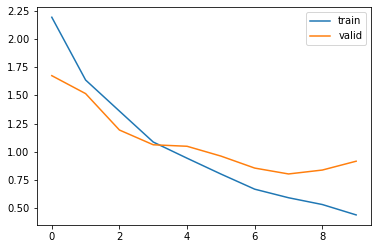

In [39]:
# Capturing recall per epoch
hist3  = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch

# Plotting recall at different epochs
plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.legend(("train" , "valid") , loc =0)

**Insights from Loss plot**

- Validation loss has reduced as compared to previous models.
- Training and Validation graphs are nearer when compared to previous models.

The over fit has reduced.

(713, 12)
range(0, 713)


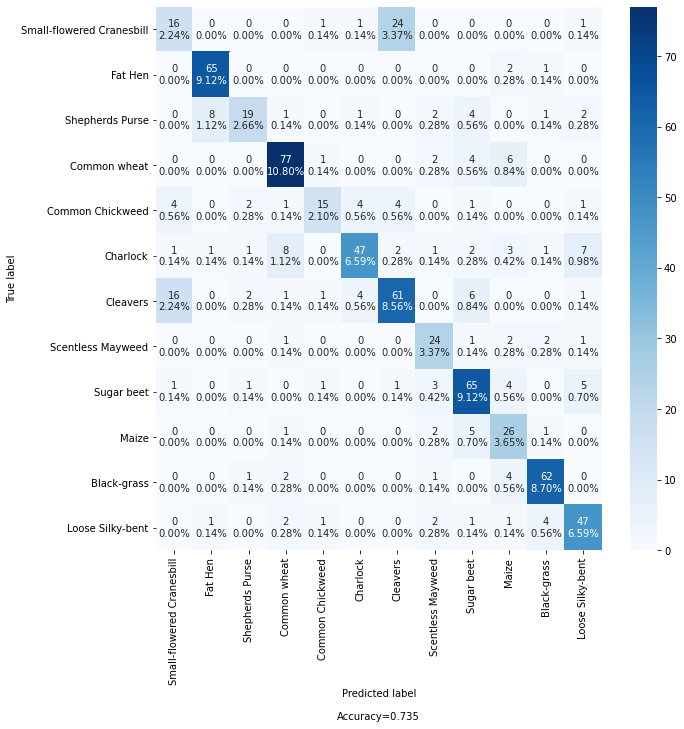

In [40]:
## Model3 ##

import seaborn as sn
y_pred1 = classifier3.predict(Img_test) # prediction probability matrix

print(y_pred1.shape)
print(range(len(y_pred2)))

# Logic to convert prediction probabilities to predictions
y_pred2 = np.zeros(shape=(y_pred1.shape[0],12))
for i in range(len(y_pred1)):
    max_ind = np.argmax(y_pred1[i])
    for j in range(12):
        if(j == max_ind):
            y_pred2[i][j] = int(1)
        else:
            y_pred2[i][j] = int(0)
            

y_pred2 = y_pred2.astype(int)    # get prediction matrix    
     

cm3 = confusion_matrix(lbl_test.argmax(axis=1), y_pred2.argmax(axis=1))

labels = ['True Negative','False Positive','False Negative','True Positive']

categories = ['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent']


make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues', figsize =(10,10))





**Insights from Confusion Matrix**

- Accuracy shows as 0.735
- Overall Accuracy has increased than the previour two models.
- Common wheat and Cleavers are two seeds which have high prediction .
- Black grass and Sugar beet also show high number of Correct predictions when compared to previous models
- Loose-silky bent and Fat Hen show good results in this model.
- 'Common chicken' weed has less correct predictions. This plants is mosly worngly predicted as Cleavers. 
May be this plant looks similar to Cleavers.
- 'Small-flowered Cranesbill' has less correct predictions. This plants is mosly worngly predicted as Cleavers. 
May be this plant looks similar to Cleavers.
But the prediction accuracy score is incresed for ('Common chicken','Small-flowered Cranesbill') when compared to previous two models.

In [41]:
score3 = classifier3.evaluate(Img_test, lbl_test)

23/23 [==============================] - 2s 108ms/step - loss: 0.8388 - accuracy: 0.7349



- Over all accuracy of the model is 73.4
- The Accuracy has increased than previous two models.
- This model has redused over fit tendency.This is due to adding dropouts and also Max pooling layers.
- Number of conv2D layers are decresed when compared to model2
- Addind Maxpooling layers also improved accuracy

### Final Selected Model from above 3 Models 

#### Classifier3 showed better results than Classifier1 and Classifier2. SO Classifier3 is selected as required model

### Classifier3 Model Summary

In [42]:
classifier3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)             

### Classifier3 Model Description

**Conv2D:**

-  Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel  which helps produce a tensor of outputs.

-  Here for this model (Classifier3), I have declared 3 Conv2D layers with 128,64, 32 nuerons.
Added Maxpooling in between

**Activation('relu'):**
    
- ReLu function is used as Activation function for all layers except output layer where softmax function is used for multiclass classification.

- 'relu' stands for Rectified linear unit. It is the most widely used activation function. Chiefly implemented in hidden layers of Neural network.
- ReLu  involves simpler mathematical operations. 

**MaxPooling2D:**

- Three MaxPooling layers are used in between Conv2D layers   
- The objective MaxPooling Layer is to down-sample an input representation.
- This is done to reduce over-fitting by providing an abstracted form of the representation. 
- it reduces the computational cost by reducing the number of parameters to learn.

**Dropout:**

- One drop layer is added at the end
- Dropout is a technique used to improve over-fit on neural networks.
- Basically during training , given percentage of neurons on a particular layer will be deactivated. This improve generalization.
- Normally some deep learning models use Dropout on the fully connected layers, but is also possible to use dropout after the max-pooling layers, creating some kind of image noise augmentation.

**Dense Layers:**

- 2 Dense layers and one output layer
- Dense layer implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

**Softmax:**

- The softmax function is also a type of sigmoid function but is handy when we are trying to handle classification problems.
- Usually used when trying to handle multiple classes. The softmax function would squeeze the outputs for each class between 0 and 1 and would also divide by the sum of the outputs.
______________

### Classifier3 Evaluation

In [43]:
classifier3.evaluate(Img_test, lbl_test)

23/23 [==============================] - 2s 107ms/step - loss: 0.8388 - accuracy: 0.7349


[0.8388015031814575, 0.7349228858947754]

**Insights**
- Over all accuracy of the model is 73.4
- The Accuracy has increased than previous two models.
- This model has redused over fit tendency.This is due to adding dropouts and also Max pooling layers.
- Number of conv2D layers are decresed when compared to model2
- Addind Maxpooling layers also improved accuracy

### Classifier3 Confusion Matrics

(713, 12)
range(0, 713)


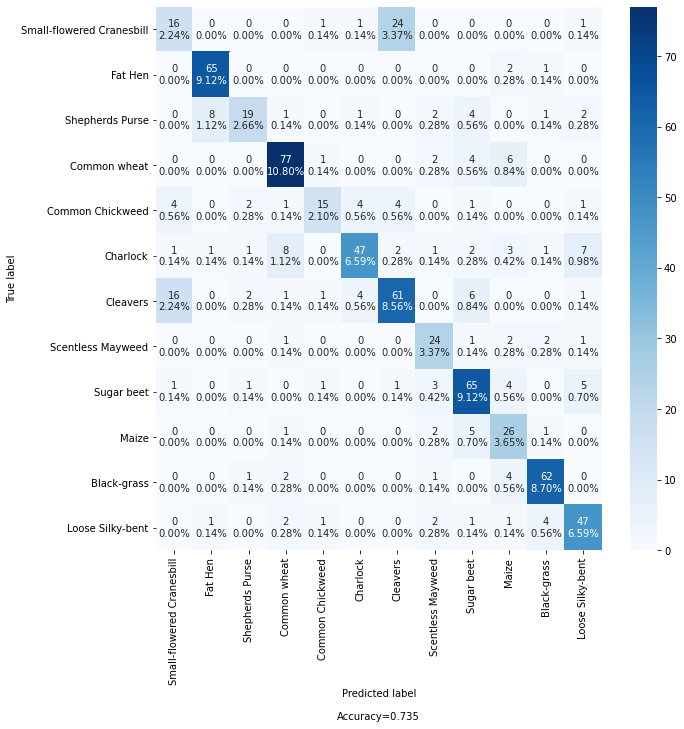

In [44]:
## Model3 ##

import seaborn as sn
y_pred1 = classifier3.predict(Img_test) # prediction probability matrix

print(y_pred1.shape)
print(range(len(y_pred2)))

# Logic to convert prediction probabilities to predictions
y_pred2 = np.zeros(shape=(y_pred1.shape[0],12))
for i in range(len(y_pred1)):
    max_ind = np.argmax(y_pred1[i])
    for j in range(12):
        if(j == max_ind):
            y_pred2[i][j] = int(1)
        else:
            y_pred2[i][j] = int(0)
            

y_pred2 = y_pred2.astype(int)    # get prediction matrix    
     

cm3 = confusion_matrix(lbl_test.argmax(axis=1), y_pred2.argmax(axis=1))

labels = ['True Negative','False Positive','False Negative','True Positive']

categories = ['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent']


make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues', figsize =(10,10))






**Insights from Confusion Matrix**

- Accuracy shows as 0.735
- Overall Accuracy has increased than the previour two models.
- Common wheat and Cleavers are two seeds which have high prediction .
- Black grass and Sugar beet also show high number of Correct predictions when compared to previous models
- Loose-silky bent and Fat Hen show good results in this model.
- 'Common chicken' weed has less correct predictions. This plants is mosly worngly predicted as Cleavers. 
May be this plant looks similar to Cleavers.
- 'Small-flowered Cranesbill' has less correct predictions. This plants is mosly worngly predicted as Cleavers. 
May be this plant looks similar to Cleavers.
But the prediction accuracy score is incresed for ('Common chicken','Small-flowered Cranesbill') when compared to previous two models.

### Classifier3 Predictions(Verify Predictions)

x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

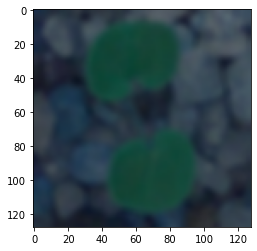

Actual data  [0 0 0 0 0 0 0 0 0 0 1 0]
Prediction data [0 0 0 0 0 0 0 0 0 0 1 0]
Given Label is  Black-grass


In [45]:
#Verify x_test[2]

plt.imshow(Img_test[2])
plt.show()

print("Actual data ", lbl_test[2])
print("Prediction data",y_pred2[2])
print("Given Label is ",categories[y_pred2[2].argmax()])
      
# Prediction label and Actual label is same. Correct Prediction

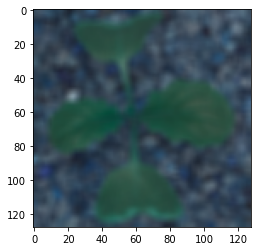

Actual data  [0 1 0 0 0 0 0 0 0 0 0 0]
Prediction data [0 1 0 0 0 0 0 0 0 0 0 0]
Given Label is  Fat Hen


In [46]:
#Verify x_test[3]

plt.imshow(Img_test[3])
plt.show()

print("Actual data ", lbl_test[3])
print("Prediction data",y_pred2[3])
print("Given Label is ",categories[y_pred2[3].argmax()])
      
    
# Prediction label and Actual label is same. Correct Prediction

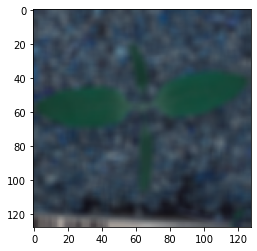

Actual data  [0 0 0 0 0 1 0 0 0 0 0 0]
Prediction data [0 0 0 0 0 1 0 0 0 0 0 0]
Given Label is  Charlock


In [47]:
#Verify x_test[33]

plt.imshow(Img_test[33])
plt.show()

print("Actual data ", lbl_test[33])
print("Prediction data",y_pred2[33])
print("Given Label is ",categories[y_pred2[33].argmax()])
      
    
# Prediction label and Actual label is same. Correct Prediction

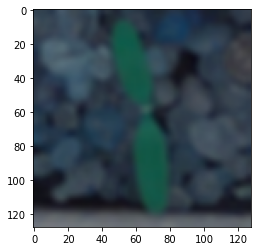

Actual data  [0 0 0 0 0 1 0 0 0 0 0 0]
Prediction data [0 0 0 0 0 1 0 0 0 0 0 0]
Given Label is  Charlock


In [48]:
#Verify x_test[36]

plt.imshow(Img_test[36])
plt.show()

print("Actual data ", lbl_test[36])
print("Prediction data",y_pred2[36])
print("Given Label is ",categories[y_pred2[36].argmax()])
      
    
# Prediction label and Actual label is same. Correct Prediction

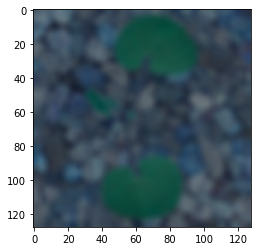

Actual data  [0 0 0 0 0 0 0 0 0 0 1 0]
Prediction data [0 0 0 0 0 0 0 0 0 0 1 0]
Given Label is  Black-grass


In [49]:
#Verify x_test[59]

plt.imshow(Img_test[59])
plt.show()

print("Actual data ", lbl_test[59])
print("Prediction data",y_pred2[59])
print("Given Label is ",categories[y_pred2[59].argmax()])
      
    
# Prediction label and Actual label is same. Correct Prediction

### Conclusions and Key takeaways


In this case study deep CNNs in Keras is used for image classification.

-  The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

In data given there are 12 variety of plant photos with labels. 
Need to identify the names correctly using this model.


- From the prediction results and confusion matrix, we can get below key takeaways
    - Given categories = ['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent']
    - Common Wheat, Sugar beet, Black grass are top three categories which show high prediction rate.
    which means these trees look distinct and they can be easily identified.
    
    - Cleavers is mostly wrongly predicted as 'Small-flowered Cranesbill'. May be these two plants look similar.
    
    - Common Chickweed,Maize, Scentless Mayweed showed very less Accuracy rate as These plants are few in the given dataset. 
    also they showed less prediction accuracy.
    
    - THe numbers show that the weeds like(Common Chickweed,Scentless Mayweed)  are mostly predicted correctly.  The results will help to differenciate between weeds and seed lings.
    
    
    
    
